In [1]:
# @author - Lauren Scalice
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read titanic.csv into a Pandas dataframe. Display the first five rows.
titanic_df = pd.read_csv("titanic.csv")
titanic_df[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Display the data types of each column. 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop passengerid, name, ticket, cabin, and embarked from the dataframe. Make Survived the last column of the dataframe.
titanic_df = titanic_df.loc[:,('Pclass','Sex','Age','SibSp','Parch','Fare','Survived')]

# Convert ‘male’ or ‘female’ to integer and store female as 0 and male as 1. Display first 5 rows
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0})
titanic_df[0:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [5]:
# Display the data types of the columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


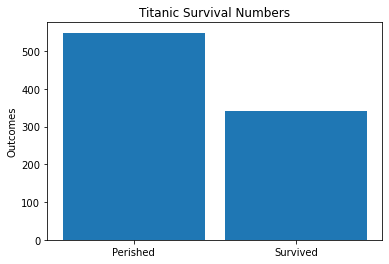

In [6]:
# Create a bar chart of the outcomes
counts = titanic_df['Survived'].value_counts()
w = 0.35  
plt.bar(x=[0,.4], height=counts, width = w)

plt.xticks([0,.4], ("Perished", 'Survived'))
plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')

plt.show()

In [7]:
# Compute and display the mean of each feature.
means = titanic_df.loc[:,('Pclass','Sex','Age','SibSp','Parch','Fare')].mean()
means

Pclass     2.308642
Sex        0.647587
Age       29.699118
SibSp      0.523008
Parch      0.381594
Fare      32.204208
dtype: float64

In [8]:
# Compute and display the mean of each feature grouped by outcome.
grouped_mean = titanic_df.loc[:,('Pclass','Sex','Age','SibSp','Parch','Fare')].groupby(titanic_df['Survived']).mean()
grouped_mean

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


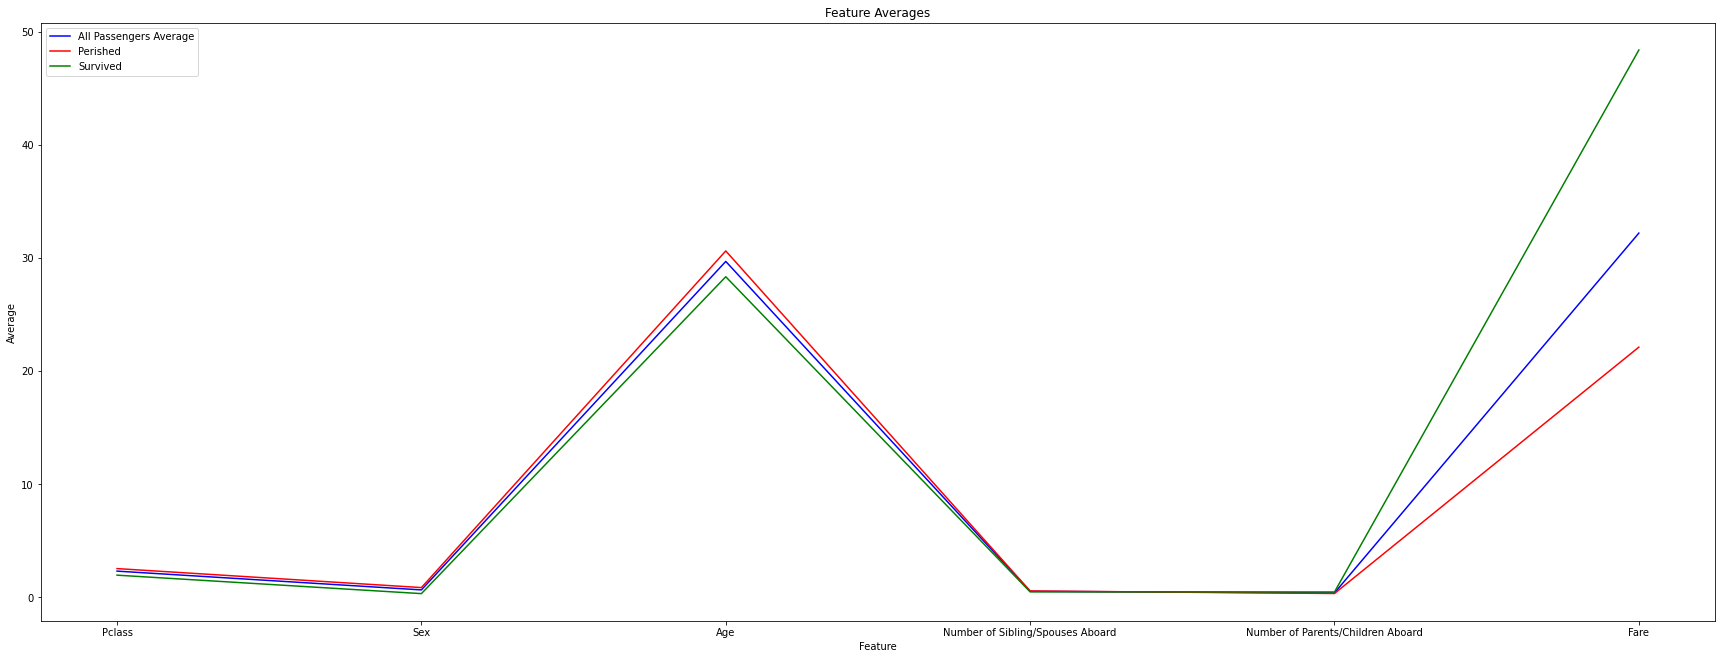

In [9]:
# Create a line graph of the averages
x_values = ('Pclass','Sex','Age','Number of Sibling/Spouses Aboard','Number of Parents/Children Aboard','Fare')

plt.figure(figsize=(30, 11))
plt.plot(x_values, means, 'b', label = 'All Passengers Average')
plt.plot(x_values, grouped_mean.loc[0,:], 'r', label = 'Perished')
plt.plot(x_values, grouped_mean.loc[1,:], 'g', label = 'Survived')

plt.title('Feature Averages')
plt.xlabel('Feature')
plt.ylabel('Average')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Fare')

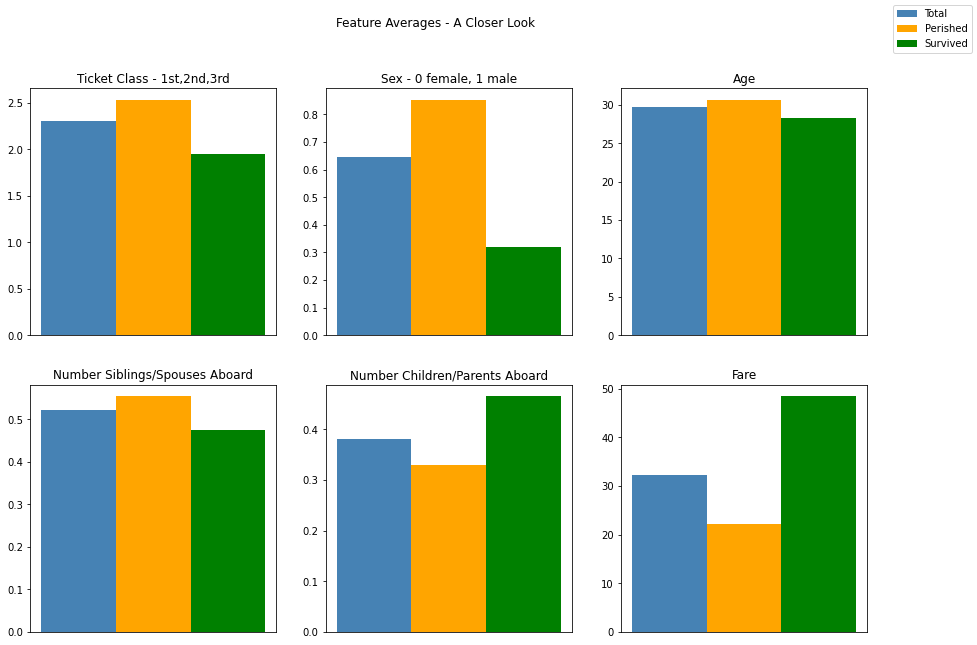

In [10]:
# Display the feature averages by feature in a series of bar charts
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Feature Averages - A Closer Look')
w = 1

values_pclass = [ means.iloc[0], grouped_mean.iloc[0,0],grouped_mean.iloc[1,0] ]
values_sex = [means.iloc[1], grouped_mean.iloc[0,1],grouped_mean.iloc[1,1]]
values_age = [means.iloc[2], grouped_mean.iloc[0,2],grouped_mean.iloc[1,2]]
values_sibsp = [means.iloc[3], grouped_mean.iloc[0,3],grouped_mean.iloc[1,3]]
values_parch = [means.iloc[4], grouped_mean.iloc[0,4],grouped_mean.iloc[1,4]]
values_fare = [means.iloc[5], grouped_mean.iloc[0,5],grouped_mean.iloc[1,5]]

pclass = ax[0,0].bar(x=np.arange(len(values_pclass)), height=values_pclass, color=['steelblue', 'orange', 'green'], width = w)
fig.legend(pclass, ('Total', 'Perished', 'Survived'), 'upper right')
ax[0,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0,0].set_title('Ticket Class - 1st,2nd,3rd')

ax[0,1].bar(x=np.arange(len(values_sex)), height=values_sex, color=['steelblue', 'orange', 'green'], width = w)
ax[0,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0,1].set_title('Sex - 0 female, 1 male')

ax[0,2].bar(x=np.arange(len(values_age)), height=values_age, color=['steelblue', 'orange', 'green'], width = w)
ax[0,2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0,2].set_title('Age')

ax[1,0].bar(x=np.arange(len(values_sibsp)), height=values_sibsp, color=['steelblue', 'orange', 'green'], width = w)
ax[1,0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1,0].set_title('Number Siblings/Spouses Aboard')

ax[1,1].bar(x=np.arange(len(values_parch)), height=values_parch, color=['steelblue', 'orange', 'green'], width = w)
ax[1,1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1,1].set_title('Number Children/Parents Aboard')

ax[1,2].bar(x=np.arange(len(values_fare)), height=values_fare, color=['steelblue', 'orange', 'green'], width = w)
ax[1,2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[1,2].set_title('Fare')

In [11]:
# Get the correlation between each feature and the dependent variable and display them
for i in range(titanic_df.loc[:,('Pclass','Sex','Age','SibSp','Parch','Fare')].shape[1]):
    print(titanic_df.columns[i],":", titanic_df.iloc[:,i].corr(titanic_df['Survived']))

Pclass : -0.3384810359610147
Sex : -0.5433513806577551
Age : -0.07722109457217764
SibSp : -0.03532249888573558
Parch : 0.08162940708348365
Fare : 0.2573065223849623


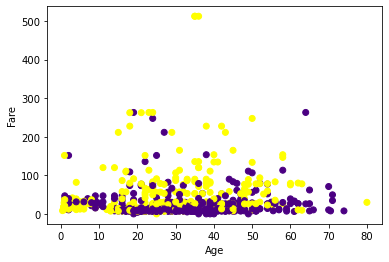

In [12]:
# Create a scatter plot of Age and Fare. The scatter plot should color code the points by outcome.
plot_colors = titanic_df['Survived'].map({0: 'indigo', 1: 'yellow'})
scatter = plt.scatter(titanic_df['Age'],titanic_df['Fare'], color=plot_colors)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()